In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import ranf
from sklearn import svm
import pandas as pd 
import nltk
import re
import csv




from nltk.corpus import gutenberg, stopwords

In [2]:
# Download the texts
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cdima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cdima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.text import Text
alice = Text(nltk.corpus.gutenberg.words('carroll-alice.txt'))

In [4]:
Stop_words = stopwords.words('english')
Sentences = gutenberg.sents('carroll-alice.txt')
TermsSentences = []

for terms in Sentences:
 terms = [w for w in terms if w not in Stop_words]
 terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
 terms = [w.lower() for w in terms]
 # Remove 'chapter' and other extra data to clean the data and reduce amount of terms
 terms = [w for w in terms if re.search(r'[A-Za-z]{3,}', w) is not None]
 terms = [w for w in terms if re.search(r'CHAPTER', w) is None]   
 TermsSentences.append(terms)

TermsSentences

[['alice', 'adventures', 'wonderland', 'lewis', 'carroll'],
 ['chapter'],
 ['down', 'rabbit', 'hole'],
 ['alice',
  'beginning',
  'get',
  'tired',
  'sitting',
  'sister',
  'bank',
  'nothing',
  'twice',
  'peeped',
  'book',
  'sister',
  'reading',
  'pictures',
  'conversations',
  'use',
  'book',
  'thought',
  'alice',
  'without',
  'pictures',
  'conversation'],
 ['considering',
  'mind',
  'well',
  'could',
  'hot',
  'day',
  'made',
  'feel',
  'sleepy',
  'stupid',
  'whether',
  'pleasure',
  'making',
  'daisy',
  'chain',
  'would',
  'worth',
  'trouble',
  'getting',
  'picking',
  'daisies',
  'suddenly',
  'white',
  'rabbit',
  'pink',
  'eyes',
  'ran',
  'close'],
 ['there',
  'nothing',
  'very',
  'remarkable',
  'alice',
  'think',
  'very',
  'much',
  'way',
  'hear',
  'rabbit',
  'say',
  'dear'],
 ['dear'],
 ['shall', 'late'],
 ['thought',
  'afterwards',
  'occurred',
  'ought',
  'wondered',
  'time',
  'seemed',
  'quite',
  'natural',
  'rabbit',


In [5]:
Transactions_list = []  # a list of transactions
Items_names = {}  # Lookup item ID to name
Items_ids = {}  # Lookup item name to ID

Items = None  # a list of item IDs, normally an increasing sequence of numbers
item_id = 0
for row in TermsSentences:
    transaction = []
    for item in row:
        if item not in Items_ids:
             Items_ids[item] = item_id
             Items_names[item_id] = item
             item_id += 1
        transaction += [Items_ids[item]]
        Transactions_list += [transaction]

M, N = len(Items_ids), len(Transactions_list)

Items = np.arange(0,M)

# Information, sanity
print(f'M={M} items, N={N} transactions')

M=2473 items, N=12946 transactions


In [6]:
# Convert to numpy arrays
Transactions = np.full((N,M), False, dtype=bool)

for i, t in enumerate(Transactions_list):
    for item in t:
        Transactions[i][item] = True
        
print([Items_names[_] for _ in Items[0:7]])
print(Transactions_list[:7])

['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'chapter', 'down']
[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [5], [6, 7, 8]]


In [7]:
Filename = 'text.csv'

with open(Filename, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', quoting=csv.QUOTE_ALL, quotechar="'", lineterminator='\n')
    writer.writerow([Items_names[i] for i in range(M)])
    for i in range(N):
        writer.writerow(list(map(lambda x: '' if x == False else 'True',  Transactions[i])))

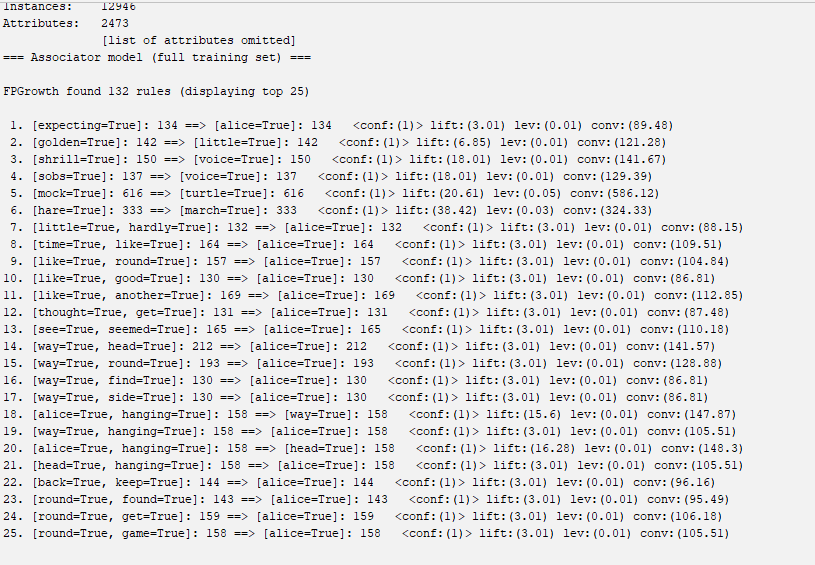

There is a rather larget confidence for multiple terms, larger than .09, and as we can see there is high frequent occurence for words such as mock, golden, alice and more. There are quite a few trends for wors such as "like", "way" and "round", which may suggest that there are tons of similes and comparisons in the text. Obviously, Alice would reappear a lot in these trends since she is the main character

In [8]:
import os
os. getcwd()

'C:\\Users\\cdima\\Applied ML\\Module11'

Rows= 60000, columns= 784
Rows= 10000, columns= 784


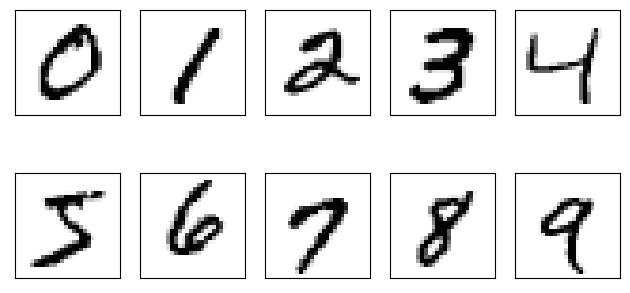

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split



def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train, y_train = load_mnist('C:\\Users\\cdima\\Applied ML\\Module11\Mnist', kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist('C:\\Users\\cdima\\Applied ML\\Module11\Mnist', kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [16]:
#Create a new hidden layer.
#Create variables z_h2 and a_h1 for hidden layer 1, and this is hidden layer 2 input (z_h2)

class NeuralNet(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    #Create two hidden layers by creating new z_h and a_h variables
    def _forward(self, X):  # Eq 2
        z_h1 = np.dot(X, self.w_h1)
        a_h1 =self.sigmoid(z_h1)
        
        #Second Layer
        z_h2 = np.dot(a_h1, self.w_h2)
        a_h2 =self.sigmoid(z_h2)
        z_out = np.dot(a_h2, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h1, a_h1, z_h2, a_h2, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h1= self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, self.n_hidden))
        
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train[batch_idx])  # neural network model
                
                sigmoid_derivative_h1 = a_h1 * (1.0-a_h1)  # Eq 3
                sigmoid_derivative_h2 = a_h2 * (1.0-a_h2)  # Eq 3
                
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5  
                delta_h2 = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h2)
                delta_h1 = (np.dot(delta_h2, self.w_h2.T) * sigmoid_derivative_h1) 
               
                grad_w_out = np.dot(a_h2.T, delta_out)  # Eq 7
                grad_w_h2 = np.dot(a_h1.T, delta_h2)
                grad_w_h1 = np.dot(X_train[batch_idx].T, delta_h1)  # Eq 8
                
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h1 -= self.eta*grad_w_h1 
                self.w_h2 -= self.eta*grad_w_h2

            # Evaluation after each epoch during training
            z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

In [17]:
nn = NeuralNet(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)
nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

300/300 | Cost: 7849.39 | Train/Valid Acc.: 98.05%/95.74%  